# Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
c911=pd.read_csv('911.csv')

In [3]:
c911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
c911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Top 5 township of 911 call

In [9]:
c911['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# Top 5 zip code for 911 call

In [11]:
c911['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# Total Unique title code for 911 call

In [13]:
c911['title'].nunique()

110

In [14]:
c911['title'].count()

99492

In [15]:
c911['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM', 'EMS: ABDOMINAL PAINS',
       'Fire: PUMP DETAIL', 'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE',
       'EMS: MATERNITY', 'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING',
       'EMS: LACERATIONS', 'Fire

In [17]:
len(c911['title'].unique())

110

# Reasons for 911 call

In [20]:
r=c911['title'].iloc[0]

In [22]:
r

'EMS: BACK PAINS/INJURY'

In [24]:
r.split(':')

['EMS', ' BACK PAINS/INJURY']

In [26]:
r.split()[0]

'EMS:'

In [31]:
r.split(':')[0]

'EMS'

In [29]:
c911['Reason']=c911['title'].apply(lambda r: r.split(':')[0])

In [32]:
c911["Reason"].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [33]:
c911['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

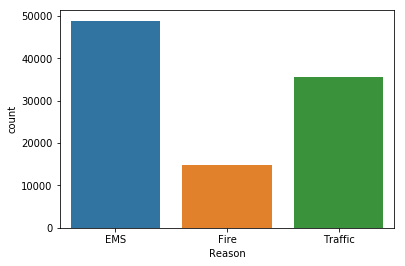

In [36]:
sns.countplot(c911['Reason'])

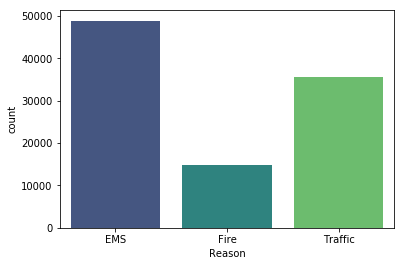

In [48]:
sns.countplot(x='Reason', data=c911, palette='viridis')

In [43]:
type(c911['timeStamp'][0])

str

# Converting str to Date time 

In [50]:
c911['datetime']=pd.to_datetime(c911['timeStamp'])

In [40]:
c911['datetime'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [41]:
datetime[0]

Timestamp('2015-12-10 17:40:00')

In [51]:
time=c911['datetime'].iloc[0]

In [52]:
time.hour

17

In [54]:
time.minute

40

In [55]:
time.day

10

In [56]:
time.month

12

In [57]:
time=c911['datetime'].iloc[4]

In [58]:
time.hour

17

In [59]:
time.dayofweek

3

In [60]:
c911['Hour']=c911['datetime'].apply(lambda time:time.hour)

In [62]:
c911['Hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

In [64]:
c911['Day of Week']=c911['datetime'].apply(lambda time:time.dayofweek)

In [66]:
c911['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [81]:
c911['Month']=c911['datetime'].apply(lambda time: time.month)

# seaborn count plot

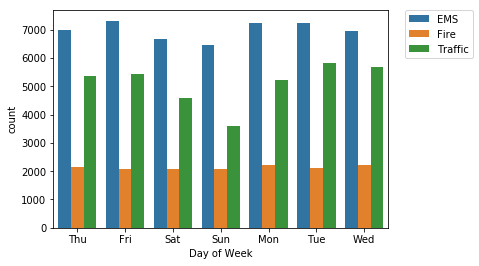

In [76]:
sns.countplot(x='Day of Week',hue='Reason', data=c911)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [69]:
daymap= {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [71]:
c911['Day of Week']=c911['Day of Week'].map(daymap)

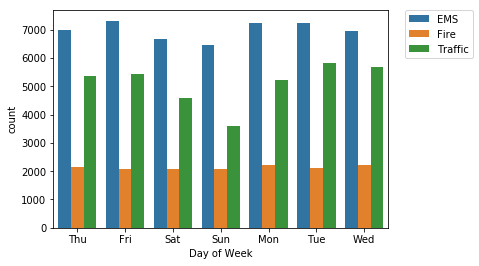

In [79]:
sns.countplot(x='Day of Week',hue='Reason', data=c911)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

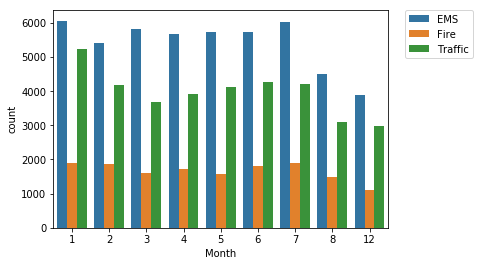

In [82]:
sns.countplot(x='Month',hue='Reason', data=c911)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# groupby method to fix missing values

In [87]:
bymonth=c911.groupby('Month')

In [92]:
bymonth=bymonth.count()

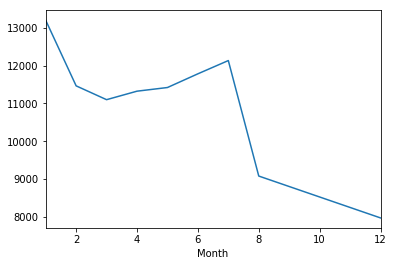

In [95]:
bymonth['Reason'].plot()

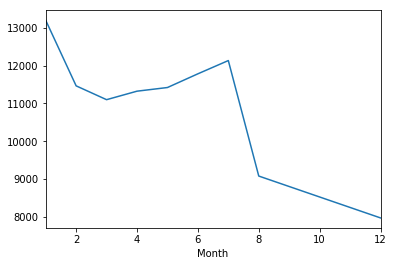

In [110]:
bymonth['lat'].plot()

In [96]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,datetime,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


# Linear Model Plot

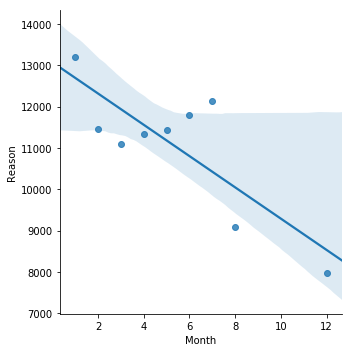

In [97]:
sns.lmplot(x='Month', y='Reason', data=bymonth.reset_index())

In [115]:
date=c911['timeStamp'].iloc[0]

In [116]:
date

'2015-12-10 17:40:00'

In [117]:
date=c911['datetime'].iloc[0]

In [118]:
date

Timestamp('2015-12-10 17:40:00')

In [120]:
date.date()

datetime.date(2015, 12, 10)

In [119]:
c911['Date']=c911['datetime'].apply(lambda date: date.date())

In [121]:
c911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,datetime,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,Thu,12,2015-12-10


In [122]:
c911.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,datetime,Hour,Day of Week,Month
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


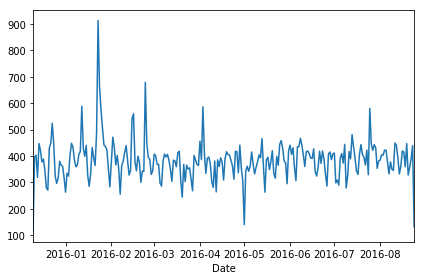

In [125]:
c911.groupby('Date').count()['lat'].plot()
plt.tight_layout()

# Representing reason for 911 call

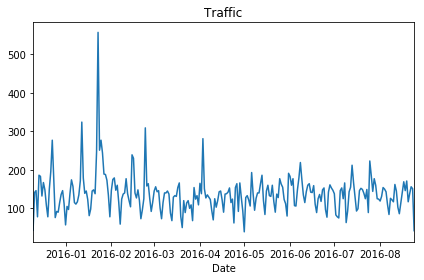

In [128]:
c911[c911['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

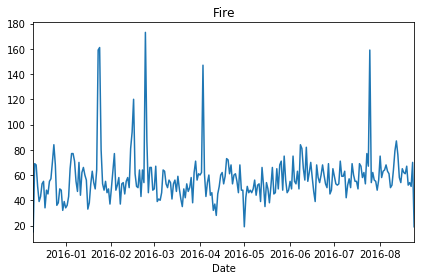

In [129]:
c911[c911['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

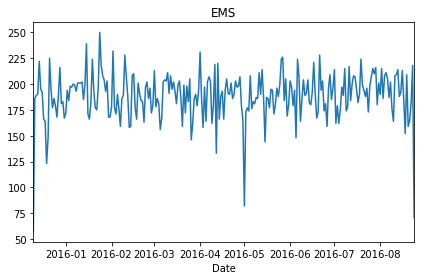

In [130]:
c911[c911['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [132]:
c911.groupby(by=['Day of Week', 'Hour']).count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  datetime  Month  Date  
Day of Week Hour                                 
Fri         0        275       275    275   275  
            1        235       235    235   235  
            2        191       191    191   191  
            3        175       175    175   175  
            4        201       201    201   201

In [133]:
c911.groupby(by=['Day of Week', 'Hour']).count().head()['Reason']

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
Name: Reason, dtype: int64

In [136]:
dayhour=c911.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


# Heatmap and clustering

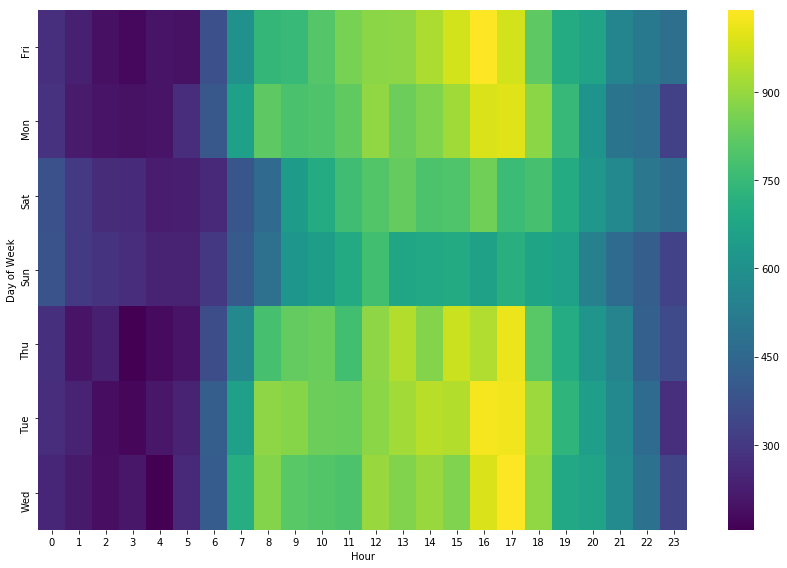

In [149]:
plt.figure(figsize=(12,8))
sns.heatmap(dayhour, cmap='viridis')
plt.tight_layout()

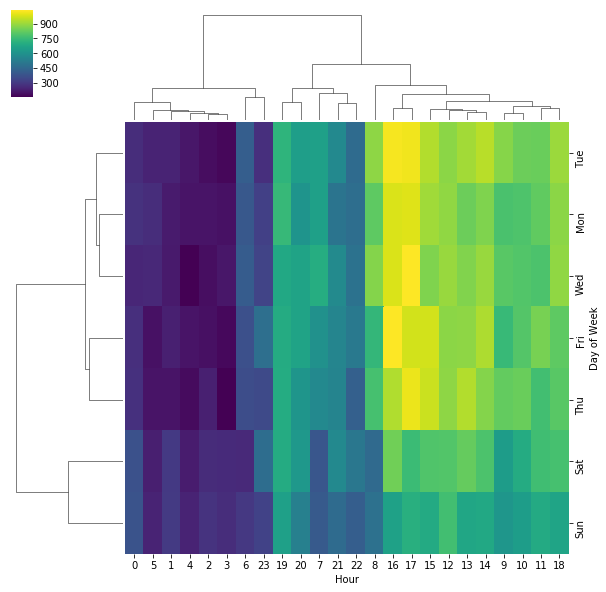

In [150]:
plt.figure(figsize=(16,10))
sns.clustermap(dayhour, cmap='viridis')

In [145]:
daymonth=c911.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
